#    https://www.kaggle.com/tevecsystems/retail-sales-forecasting

import the vaious libraries 

In [1]:
import pandas as pd 
import numpy as np 
from pmdarima import auto_arima
from fbprophet import Prophet
import matplotlib.pyplot as plt
import warnings
plt.style.use("ggplot")
warnings.filterwarnings("ignore")

Load data into pandas 

In [2]:
df = pd.read_csv(r"C:\Users\Michael Okuns\Downloads\TV_Forecast\mock_kaggle.csv")

In [3]:
df.head()

,data,venda,estoque,preco
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29
3,2014-01-04,93,4750,1.29
4,2014-01-05,96,4654,1.29


rename the columns 

In [4]:
df.columns = ["date", "sale", "stock", "price"]

In [5]:
data = df.copy()

In [6]:
data.head()

,date,sale,stock,price
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29
3,2014-01-04,93,4750,1.29
4,2014-01-05,96,4654,1.29


making the date an index 

In [7]:
data.set_index("date", inplace = True)

checking for missing values 

In [8]:
data.isna().sum()

sale     0
stock    0
price    0
dtype: int64

Yes!!!! no missing values. The next step is to visualize our sale data cause we would be doing a forecast on the sales column.

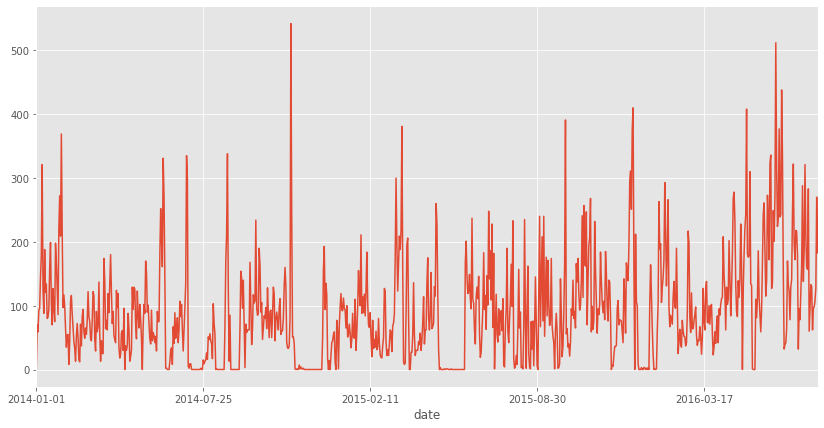

In [9]:
data["sale"].plot(figsize = (14, 7))

In [10]:
data.columns

Index(['sale', 'stock', 'price'], dtype='object')

Calculate the rolling window this would help in smoothing out short time flunctuation and highlight longer-term trends or cycles.

In [11]:
cols = ['stock', 'price']
window3 = 3
window7 = 7
for col in cols:
    data[col + "rollingmean3"] = data[col].rolling(window = window3).mean()
    data[col + "rollingmean7"] = data[col].rolling(window = window7).mean()

for col in cols:
    data[col + "rollingstd3"] = data[col].rolling(window = window3).std()
    data[col + "rollingstd7"] = data[col].rolling(window = window7).std()


In [12]:
data.head()

,sale,stock,price,stockrollingmean3,stockrollingmean7,pricerollingmean3,pricerollingmean7,stockrollingstd3,stockrollingstd7,pricerollingstd3,pricerollingstd7
date,,,,,,,,,,,
2014-01-01,0,4972,1.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-02,70,4902,1.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,59,4843,1.29,4905.666667,NaN,1.29,NaN,64.578118,NaN,0.0,NaN
2014-01-04,93,4750,1.29,4831.666667,NaN,1.29,NaN,76.631151,NaN,0.0,NaN
2014-01-05,96,4654,1.29,4749.000000,NaN,1.29,NaN,94.503968,NaN,0.0,NaN


In [13]:
data.columns

Index(['sale', 'stock', 'price', 'stockrollingmean3', 'stockrollingmean7',
       'pricerollingmean3', 'pricerollingmean7', 'stockrollingstd3',
       'stockrollingstd7', 'pricerollingstd3', 'pricerollingstd7'],
      dtype='object')

Some data has been generated and added to our table. Next is to fill in missing values, the value we would be using is zero.

In [14]:
for col in data.columns:
    data[col].fillna(0, inplace = True)

Creating the independent features for modelling 

In [15]:
ind_feature = ['stockrollingmean3', 'stockrollingmean7',
       'pricerollingmean3', 'pricerollingmean7', 'stockrollingstd3',
       'stockrollingstd7', 'pricerollingstd3', 'pricerollingstd7']

spliting our data into train and test data

In [16]:
train_data = data[:468]
test_data = data[468:]

auto arima is a library that search for thne best MA(q), integrated(d), AR(p) for the model.
AR(p) -- Auto Regressive,  
MA(q) -- Moving Average, 
Intergrated (d)

In [17]:
model = auto_arima(train_data["sale"], exogenous = train_data[ind_feature], trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=5057.738, Time=3.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=5264.718, Time=1.51 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=5064.035, Time=1.93 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=5092.363, Time=1.72 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5284.620, Time=1.90 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=5055.165, Time=3.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=5076.239, Time=3.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=5062.485, Time=2.46 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=5057.862, Time=3.18 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=5066.500, Time=1.56 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=5059.326, Time=2.05 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=5059.788, Time=3.95 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=5054.580, Time=1.66 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=5075.110, Time=2.28 sec
 ARIMA(1,0,1)(0,0,0)[0]          

fitting the model with train data

In [18]:
model.fit(train_data["sale"], train_data[ind_feature])

ARIMA(order=(1, 0, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

predicting on the test data, ensuring the number of rows of the prediction is the same as the number of rows of the test data

In [19]:
forecast = model.predict(n_periods = len(test_data), exogenous =test_data[ind_feature])

In [20]:
test_data["forecast"] = forecast

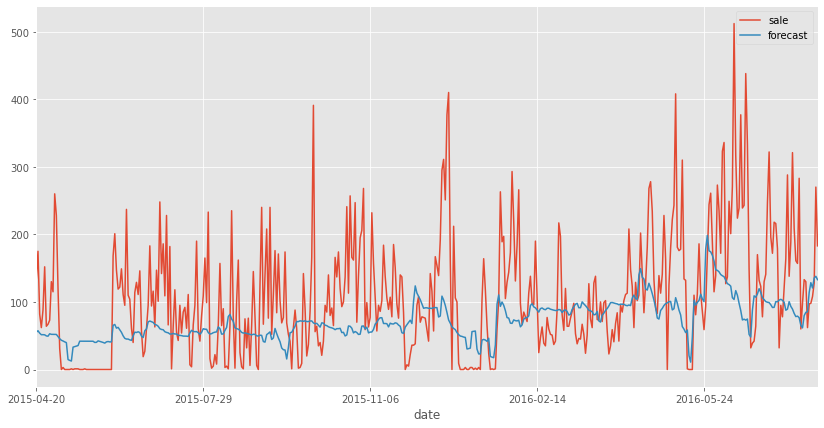

In [22]:
test_data[["sale", "forecast"]].plot(figsize = (14, 7))

In [23]:
from sklearn import metrics

calcualate the error of the forecast 

In [24]:
np.sqrt(metrics.mean_squared_error(test_data["sale"], test_data["forecast"]))

87.21301243292808

In [25]:
metrics.mean_absolute_error(test_data['sale'],test_data['forecast'])

62.77535502364127

# fbProphet

Goal of using fbprophet is to get the monthly and daily trend of sales in the retail shop 

In [26]:
df.head()

,date,sale,stock,price
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29
3,2014-01-04,93,4750,1.29
4,2014-01-05,96,4654,1.29


drop price and stock column because they ain't needed

In [27]:
df.drop(["stock", "price"], 1, inplace = True)

In [28]:
df.columns 

Index(['date', 'sale'], dtype='object')

In [29]:
df.rename(columns = {"date":"ds", "sale":"y"}, inplace = True)

In [31]:
my_model = Prophet(interval_width = 0.95)
my_model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
future_date = my_model.make_future_dataframe(periods = -1, freq = "D")
future_date.tail()

,ds
932,2016-07-27
933,2016-07-28
934,2016-07-29
935,2016-07-30
936,2016-07-31


In [33]:
forecast  = my_model.predict(future_date)
forecast[["ds", "yhat", "yhat_upper", "yhat_lower"]].tail()

,ds,yhat,yhat_upper,yhat_lower
932,2016-07-27,135.624204,263.014144,2.171907
933,2016-07-28,118.872958,250.685598,-4.880253
934,2016-07-29,129.717858,256.185943,-3.617969
935,2016-07-30,180.454878,307.680554,43.643249
936,2016-07-31,134.556965,262.204642,8.773652


In [ ]:
#my_model.plot(forecast, uncertainty = False,  plot_cap=True)
#plt.show()

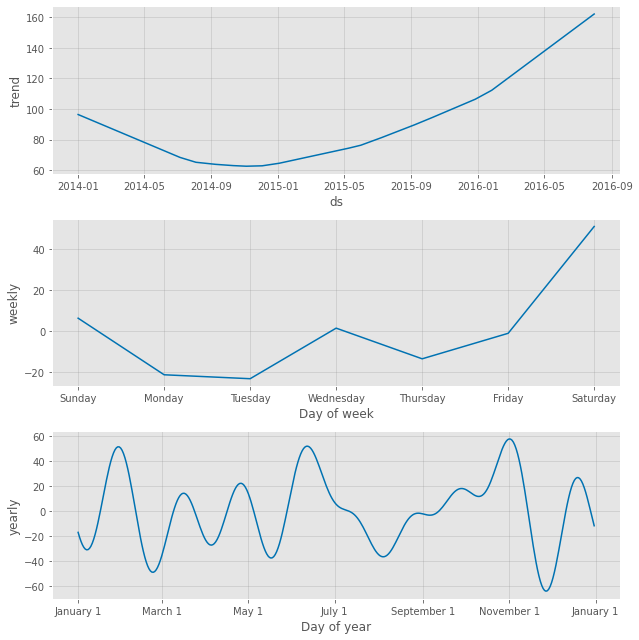

In [35]:
my_model.plot_components(forecast, uncertainty=False)
plt.show()

From the plot above we could observe that large sales on be made on saturday on daily basis and the lowest 
sales is made on tuesday while on month basis it the shops peak period is always November. 